In [1]:
import solvers
import torch
import matplotlib.pyplot as plt
import numpy as np

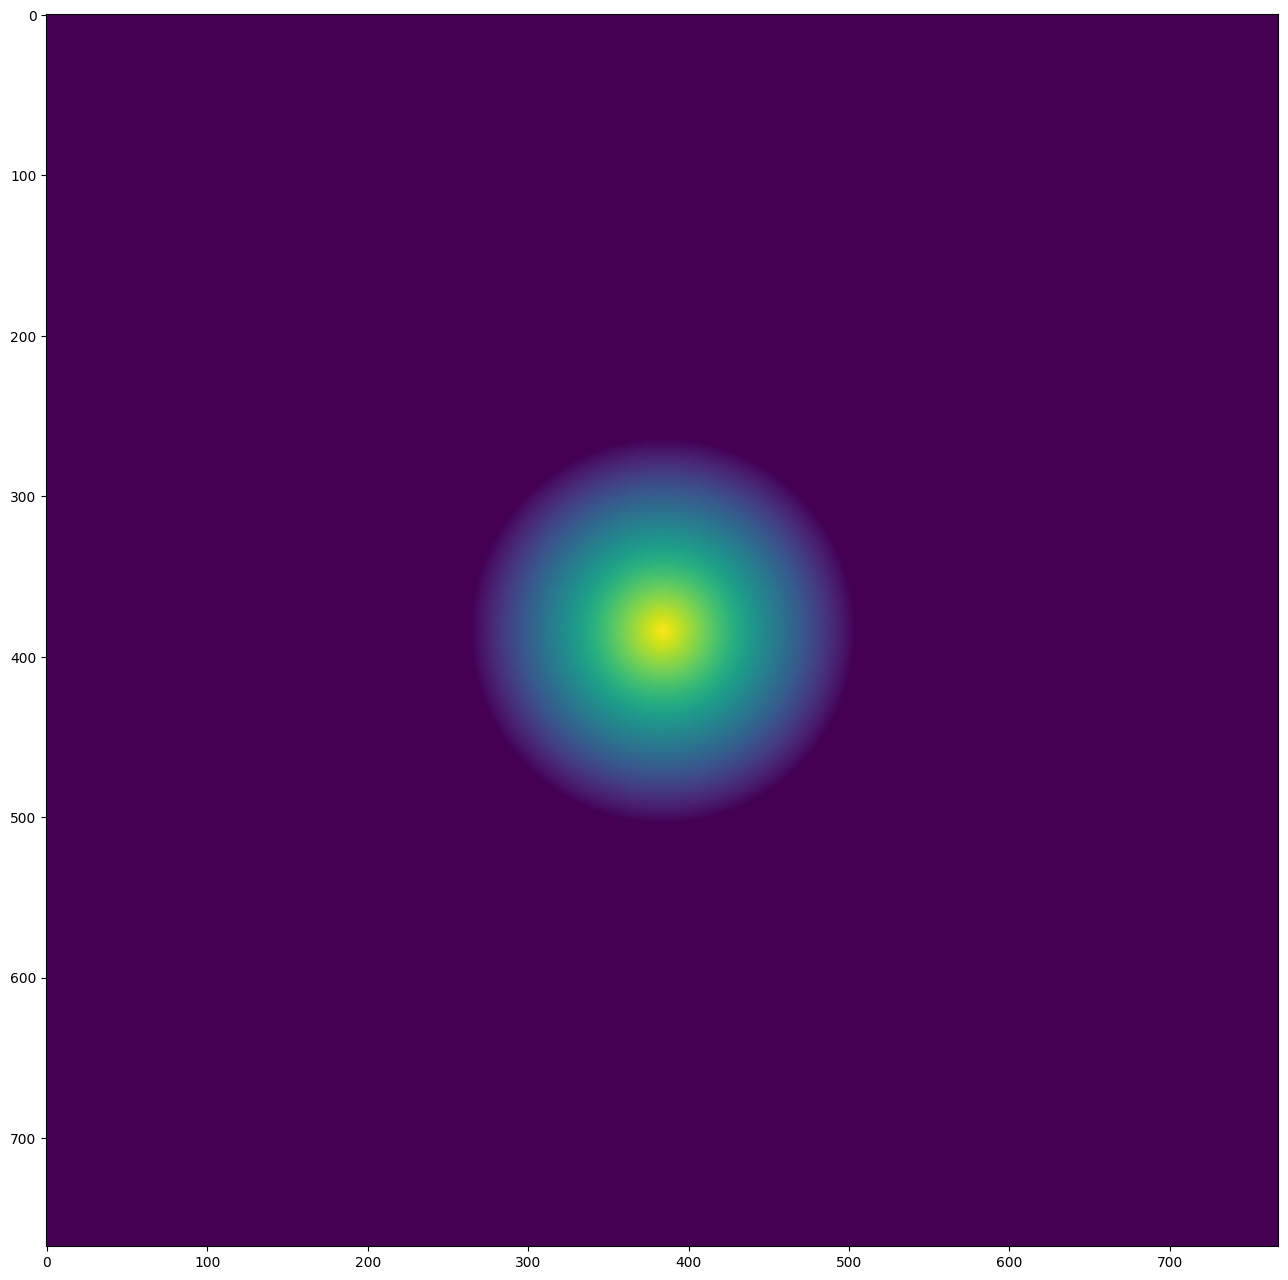

In [19]:
grid_resolution = 768, 768
window_res = 768, 768

current_frame = torch.zeros((*grid_resolution, 3), dtype=torch.float32)

next_frame = solvers.interaction_step(
	frame=current_frame,
	interaction_radius=120,
	mouse_x=384,
	mouse_y=384,
	grid_resolution=grid_resolution,
	window_res=window_res,
	mouse_acceleration=(50, 50),
	dt=1,
)

def normalize_array(arr):
    """Scales an input NumPy array to the range [0, 1]."""
    min_val = np.min(arr)
    max_val = np.max(arr)
    return (arr - min_val) / (max_val - min_val) if max_val > min_val else np.zeros_like(arr)


next_frame = normalize_array(next_frame.numpy())

next_frame = (next_frame * 255).astype(np.uint8)

plt.figure(figsize=(16, 16))
plt.imshow(next_frame[:, :, 0])
plt.show()

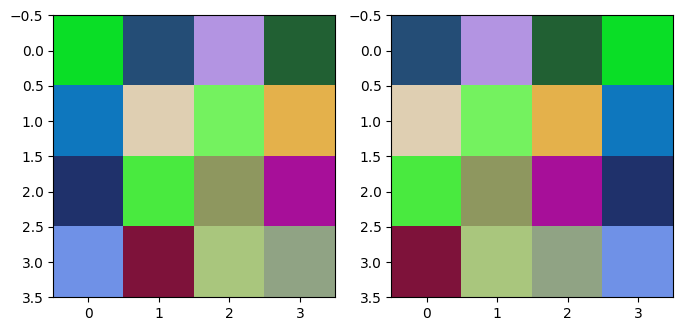

In [ ]:
grid = torch.rand((4, 4, 3))

up = torch.roll(grid, -1, dims=0)
down = torch.roll(grid, 1, dims=0)

left = torch.roll(grid, -1, dims=1)
right = torch.roll(grid, 1, dims=1)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].imshow(grid)

axs[1].imshow(right)

plt.show()